In [1]:
import kinase_library as kl
import numpy as np
import pandas as pd

In [2]:
prot_info = pd.read_json('../data/phosphosite_sequences/phosphosite_df.json')
prot_info

,id,sites,sequence
0,A0A024R4G9,"[14, 16, 20]",MTVLEAVLEIQAITGSRLLSMVPGPARPPGSCWDPTQCTRTWLLSH...
1,A0A075B759,"[40, 79, 93, 119]",MVNSVVFFEITRDGKPLGRISIKLFADKIPKTAENFRALSTGEKGF...
2,A0A087WP46,"[359, 972, 973, 974, 988, 997, 1000, 1005, 101...",MARDGAEQPDSGPLPRPSPCPQEDRASNLMPPKPPRTWGLQLQGPS...
3,A0A087WPF7,"[32, 43, 622, 626, 798, 941, 956, 1031, 1038, ...",MDGPTRGHGLRKKRRSRSQRDRERRSRAGLGTGAAGGIGAGRTRAP...
4,A0A087WQ53,[58],MGQNNNVTEFILLGLTQDPAGQKVLFVMFLLIYIVKIVGNLLIVGT...
...,...,...,...
42252,XP_997087,"[347, 907, 915, 918, 927]",MENFLALMNSISDTWMSPSCMDIAMDMGIAFVCGAGLFFLLLPFLK...
42253,YP_009725299,"[504, 660, 661, 794, 1826]",APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVEL...
42254,YP_009725305,[5],NNELSPVALRQMSCAAGTTQTACTDDNALAYYNTTKGGRFVLALLS...
42255,YP_009725309,[56],AENVTGLFKDCSKVITGLHPTQAPTHLSVDTKFKTEGLCVDIPGIP...


In [3]:
kinase_info = pd.read_csv('../data/kinase_library/kinome_information.tsv', sep='\t')
kinase_info

,MATRIX_NAME,KINASE,GENE_NAME,TYPE,SUBTYPE,FAMILY,UNIPROT_ID,UNIPROT_ENTRY_NAME,PDB_ID,KL_LIBRARY,DUAL_SPECIFICITY,DISPLAY_NAME
0,AAK1,AAK1,AAK1,ser_thr,STK,Other,Q2M2I8,AAK1_HUMAN,4WSQ,ser_thr,False,AAK1
1,ACVR2A,ACVR2A,ACVR2A,ser_thr,STK,TKL,P27037,AVR2A_HUMAN,3Q4T,ser_thr,False,ACVR2A
2,ACVR2B,ACVR2B,ACVR2B,ser_thr,STK,TKL,Q13705,AVR2B_HUMAN,2H62,ser_thr,False,ACVR2B
3,AKT1,AKT1,AKT1,ser_thr,STK,AGC,P31749,AKT1_HUMAN,1H10,ser_thr,False,AKT1
4,AKT2,AKT2,AKT2,ser_thr,STK,AGC,P31751,AKT2_HUMAN,1GZK,ser_thr,False,AKT2
...,...,...,...,...,...,...,...,...,...,...,...,...
398,VEGFR2,VEGFR2,KDR,tyrosine,RTK,VEGFR,P35968,VGFR2_HUMAN,1VR2,tyr,False,VEGFR2
399,VEGFR3,VEGFR3,FLT4,tyrosine,RTK,VEGFR,P35916,VGFR3_HUMAN,4BSJ,tyr,False,VEGFR3
400,WEE1_TYR,WEE1,WEE1,tyrosine,ncTK,WEE,P30291,WEE1_HUMAN,1X8B,ser_thr_tyr,False,WEE1 (Tyr)
401,YES,YES,YES1,tyrosine,nRTK,SRC,P07947,YES_HUMAN,2HDA,tyr,False,YES


In [4]:
kinase_info=kinase_info.set_index('MATRIX_NAME')

In [5]:
kinase_info

,KINASE,GENE_NAME,TYPE,SUBTYPE,FAMILY,UNIPROT_ID,UNIPROT_ENTRY_NAME,PDB_ID,KL_LIBRARY,DUAL_SPECIFICITY,DISPLAY_NAME
MATRIX_NAME,,,,,,,,,,,
AAK1,AAK1,AAK1,ser_thr,STK,Other,Q2M2I8,AAK1_HUMAN,4WSQ,ser_thr,False,AAK1
ACVR2A,ACVR2A,ACVR2A,ser_thr,STK,TKL,P27037,AVR2A_HUMAN,3Q4T,ser_thr,False,ACVR2A
ACVR2B,ACVR2B,ACVR2B,ser_thr,STK,TKL,Q13705,AVR2B_HUMAN,2H62,ser_thr,False,ACVR2B
AKT1,AKT1,AKT1,ser_thr,STK,AGC,P31749,AKT1_HUMAN,1H10,ser_thr,False,AKT1
AKT2,AKT2,AKT2,ser_thr,STK,AGC,P31751,AKT2_HUMAN,1GZK,ser_thr,False,AKT2
...,...,...,...,...,...,...,...,...,...,...,...
VEGFR2,VEGFR2,KDR,tyrosine,RTK,VEGFR,P35968,VGFR2_HUMAN,1VR2,tyr,False,VEGFR2
VEGFR3,VEGFR3,FLT4,tyrosine,RTK,VEGFR,P35916,VGFR3_HUMAN,4BSJ,tyr,False,VEGFR3
WEE1_TYR,WEE1,WEE1,tyrosine,ncTK,WEE,P30291,WEE1_HUMAN,1X8B,ser_thr_tyr,False,WEE1 (Tyr)


In [6]:
def mark_fn(row):
    buf = []
    print(row['id'])
    split_seq = list(row['sequence'])
    for i in row['sites']:
        idx = eval(i) - 1 # 1-based indices in sites
        split_seq[idx] = str.lower(split_seq[idx])
    
    win_size = 6
    for i in row['sites']:
        idx = eval(i) - 1
        if split_seq[idx] not in ['s', 't', 'y']:
            continue
        left = idx - win_size
        left_pad = []
        while left < 0:
            left_pad.append('_')
            left += 1

        right = idx + win_size + 1
        right_pad = []
        while right > len(split_seq):
            right_pad.append('_')
            right -= 1
        window = split_seq[left:right]
        window = left_pad + window + right_pad
        #window[win_size] = window[win_size] + '*'
        buf.append("".join(window))

    preds = {
        'Name' : [],
        'Family' : [],
        'Score' : [],
        'Score Rank' : [],
        'Percentile' : [],
        'Percentile Rank' : []
    }
    for window in buf:
        sub = kl.Substrate(window, pp=True) # using phosphopriming
        
        prediction = sub.predict().reset_index(names='Name').iloc[0].to_dict()
        preds['Family'].append(kinase_info.loc[prediction['Name']]['FAMILY'])
        for k, v in prediction.items():
            preds[k].append(v)

    return preds

In [ ]:
chunk_size = 500
pred_chunks = []
for i in range(0, prot_info.shape[0] // chunk_size + 1):
    chunk = prot_info.iloc[i * chunk_size : (i + 1) * chunk_size]
    out = chunk.apply(mark_fn, axis=1)
    out.to_json(f'kinase_pred_chunk_{i}.json')


A0A024R4G9
A0A075B759
A0A087WP46
A0A087WPF7
A0A087WQ53
A0A087WQ89
A0A087WQP5
A0A087WR82
A0A087WUL8
A0A096LNH2
A0A096LP49
A0A096LP55
A0A096MIZ1
A0A096MJJ4
A0A096MJN4
A0A096MJT6
A0A096MK47
A0A096MKA8
A0A0A0MQ87
A0A0A6YY25
A0A0B4J1F3
A0A0B4J1G0
A0A0B4J1L0
A0A0B4J1M2
A0A0B4J2A2
A0A0B4J2F2
A0A0C4DFX5
A0A0G2JEB6
A0A0G2JFH2
A0A0G2JFH3
A0A0G2JTM7
A0A0G2JTR4
A0A0G2JTZ2
A0A0G2JUA5
A0A0G2JUG7
A0A0G2JV04
A0A0G2JV12
A0A0G2JVL5
A0A0G2JVZ7
A0A0G2JWA8
A0A0G2JXN2
A0A0G2JY22
A0A0G2JZ71
A0A0G2JZA1
A0A0G2K094
A0A0G2K0D3
A0A0G2K1J3
A0A0G2K1Q8
A0A0G2K344
A0A0G2K369
A0A0G2K3F3
A0A0G2K472
A0A0G2K475
A0A0G2K543
A0A0G2K715
A0A0G2K719
A0A0G2K744
A0A0G2K7U7
A0A0G2K8N1
A0A0G2K9M5
A0A0G2KA14
A0A0G2QC33
A0A0J9YU71
A0A0J9YUW3
A0A0J9YVE4
A0A0J9YWL9
A0A0M3U1B0
A0A0R4J0D1
A0A0U1RPR8
A0A0U1RQK7
A0A0U1RR07
A0A140LIF8
A0A1B0GTR3
A0A1D5RMD1
A0A1W2P872
A0A1W2P884
A0A286YCX6
A0A286YDN9
A0A2U3TZ82
A0A338P6K9
A0A338P6N4
A0A494BA31
A0A494BBH0
A0A571BF63
A0A5F8MPU3
A0A5F9ZHR4
A0A8I5ZXP5
A0A8I6AI80
A0A8I6AVA8
A0A8I6AXR8
A0A8I6GE08

In [7]:
import glob
import json

total_preds = {}
for path in glob.glob('*_chunk*.json'):
    with open(path, 'r') as f:
        chunk = json.load(f)
        corrected = {int(k) : v for k, v in chunk.items()}
        total_preds.update(corrected)

In [3]:
prot_info['kinase_preds'] = total_preds
prot_info.to_json('../data/prots_with_kinase_preds.json')
prot_info

NameError: name 'total_preds' is not defined

In [4]:
prot_info = pd.read_json('../data/prots_with_kinase_preds.json')

In [5]:
import torch

model_preds = torch.load('../data/preds/encoder_S_60_focal_results.pkl', map_location='cpu')


In [7]:
test_df = pd.DataFrame.from_dict(model_preds['fold_0'], orient='index')
test_df

,preds,mask,labels
A0A024R4G9,"[1.3102006, -0.17383923, 12.289005, 12.262265,...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
A0A087WQP5,"[9.380087, 5.913703, 5.4635296, 9.701796, 7.30...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
A0A0R4J0D1,"[10.047708, -5.7488165, 3.9704487, -4.3389153,...","[False, False, False, False, True, False, Fals...","[-1.0, -1.0, -1.0, -1.0, 0.0, -1.0, -1.0, -1.0..."
A0PJX2,"[4.7624474, 10.405597, 6.2950387, 9.6626425, 1...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
A1IGU4,"[6.3073754, -2.3310432, 6.6448846, 9.5634, 9.8...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
...,...,...,...
XP_228801,"[11.25629, -4.862249, 11.555072, 12.253333, 8....","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
XP_357051,"[11.96768, 10.935165, 10.574868, -2.1173868, -...","[False, False, False, True, False, True, False...","[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,..."
XP_574346,"[-4.933899, -5.9270597, -2.6820223, 11.888879,...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
XP_575592,"[8.243723, 12.256642, 12.295804, 12.280654, 12...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."


In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

test_df['valid_labels'] = test_df.apply(lambda row: row['labels'][row['mask']], axis=1)
test_df['valid_preds'] = test_df.apply(lambda row: sigmoid(row['preds'][row['mask']]), axis=1)
test_df

,preds,mask,labels,valid_labels,valid_preds
A0A024R4G9,"[1.3102006, -0.17383923, 12.289005, 12.262265,...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.9999957, 0.007168383, 0.41838643, 0.0057205..."
A0A087WQP5,"[9.380087, 5.913703, 5.4635296, 9.701796, 7.30...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[1.0, 1.0, 1.0]","[0.6679378, 0.7815897, 0.8087279]"
A0A0R4J0D1,"[10.047708, -5.7488165, 3.9704487, -4.3389153,...","[False, False, False, False, True, False, Fals...","[-1.0, -1.0, -1.0, -1.0, 0.0, -1.0, -1.0, -1.0...","[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0005879463, 0.025296329, 0.024493909, 0.028..."
A0PJX2,"[4.7624474, 10.405597, 6.2950387, 9.6626425, 1...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9108441, 0.47042927, 0.00022831178, 0.00112..."
A1IGU4,"[6.3073754, -2.3310432, 6.6448846, 9.5634, 9.8...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.025304234, 0.07254591, 0.051577687, 0.96696..."
...,...,...,...,...,...
XP_228801,"[11.25629, -4.862249, 11.555072, 12.253333, 8....","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.29811525, 0.0145719005, 0.00011818441, 0.00..."
XP_357051,"[11.96768, 10.935165, 10.574868, -2.1173868, -...","[False, False, False, True, False, True, False...","[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.10741836, 0.0019227876, 0.0002614826, 0.000..."
XP_574346,"[-4.933899, -5.9270597, -2.6820223, 11.888879,...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00022032445, 0.0011725393, 9.3067174e-05, 9..."
XP_575592,"[8.243723, 12.256642, 12.295804, 12.280654, 12...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0006708452, 0.001747982, 0.00027795965, 0.0..."


In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef, average_precision_score, roc_auc_score
prot_info = prot_info.set_index('id')

In [16]:
lengths = [len(prot_info.loc[x]['sequence']) for x in test_df.index]
test_df['length'] = lengths
test_df

,preds,mask,labels,valid_labels,valid_preds,length
A0A024R4G9,"[1.3102006, -0.17383923, 12.289005, 12.262265,...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.9999957, 0.007168383, 0.41838643, 0.0057205...",117
A0A087WQP5,"[9.380087, 5.913703, 5.4635296, 9.701796, 7.30...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[1.0, 1.0, 1.0]","[0.6679378, 0.7815897, 0.8087279]",138
A0A0R4J0D1,"[10.047708, -5.7488165, 3.9704487, -4.3389153,...","[False, False, False, False, True, False, Fals...","[-1.0, -1.0, -1.0, -1.0, 0.0, -1.0, -1.0, -1.0...","[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0005879463, 0.025296329, 0.024493909, 0.028...",363
A0PJX2,"[4.7624474, 10.405597, 6.2950387, 9.6626425, 1...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9108441, 0.47042927, 0.00022831178, 0.00112...",215
A1IGU4,"[6.3073754, -2.3310432, 6.6448846, 9.5634, 9.8...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.025304234, 0.07254591, 0.051577687, 0.96696...",676
...,...,...,...,...,...,...
XP_228801,"[11.25629, -4.862249, 11.555072, 12.253333, 8....","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.29811525, 0.0145719005, 0.00011818441, 0.00...",513
XP_357051,"[11.96768, 10.935165, 10.574868, -2.1173868, -...","[False, False, False, True, False, True, False...","[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.10741836, 0.0019227876, 0.0002614826, 0.000...",976
XP_574346,"[-4.933899, -5.9270597, -2.6820223, 11.888879,...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00022032445, 0.0011725393, 9.3067174e-05, 9...",463
XP_575592,"[8.243723, 12.256642, 12.295804, 12.280654, 12...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0006708452, 0.001747982, 0.00027795965, 0.0...",513


# Sanity check for predictions

In [ ]:
from functools import partial

def gather_fn(vals, buffer):
    buffer.extend(vals)

out = {}

preds = []
labels = []
test_df['valid_preds'].apply(partial(gather_fn, buffer=preds))
test_df['valid_labels'].apply(partial(gather_fn, buffer=labels))

labels = np.asarray(labels, np.int8)
binary_preds = (np.asarray(preds) > 0.5).astype(np.int8)

# Calculate metrics
metrics = f1_score, precision_score, recall_score, average_precision_score, matthews_corrcoef, roc_auc_score
names = ['f1', 'precision', 'recall', 'auprc', 'mcc', 'auroc']
for metric, name in zip(metrics, names):
    try:
        out[name] = metric(labels, preds)
    except ValueError:
        out[name] = metric(labels, binary_preds)

out

{'f1': 0.5957331684316302,
 'precision': 0.7882786130714943,
 'recall': 0.47878486674535625,
 'auprc': 0.6935073384021093,
 'mcc': 0.556017612718788,
 'auroc': 0.8387992565973178}

Matches the saved metric scores

In [17]:
brackets = [i * 200 for i in range(7)]
hist = np.histogram(test_df['length'], brackets)

In [18]:
hist

(array([329, 753, 586, 330, 210,  36], dtype=int64),
 array([   0,  200,  400,  600,  800, 1000, 1200]))

[Text(0.5, 0, 'Protein length'), Text(0, 0.5, 'Proportion of data')]

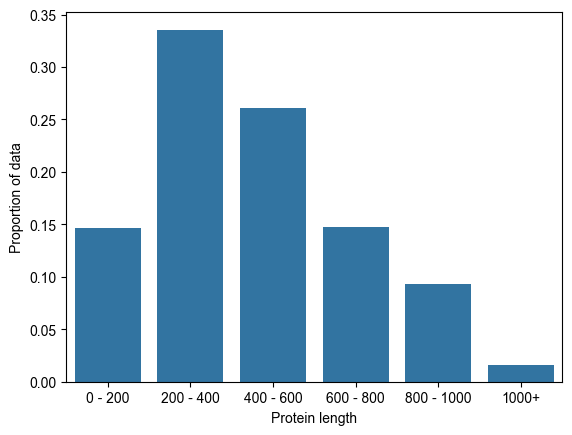

In [19]:
import seaborn as sn

y = [f"{hist[1][i]} - {hist[1][i + 1]}" for i in range(len(hist[1]) - 1)]
y[-1] = f"{hist[1][-2]}+"
ax = sn.barplot(x=y, y=hist[0] / np.sum(hist[0]))
ax.set(xlabel='Protein length', ylabel='Proportion of data')

In [20]:
test_df['length_label'] = np.digitize(test_df['length'], brackets)
test_df

,preds,mask,labels,valid_labels,valid_preds,length,length_label
A0A024R4G9,"[1.3102006, -0.17383923, 12.289005, 12.262265,...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.9999957, 0.007168383, 0.41838643, 0.0057205...",117,1
A0A087WQP5,"[9.380087, 5.913703, 5.4635296, 9.701796, 7.30...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[1.0, 1.0, 1.0]","[0.6679378, 0.7815897, 0.8087279]",138,1
A0A0R4J0D1,"[10.047708, -5.7488165, 3.9704487, -4.3389153,...","[False, False, False, False, True, False, Fals...","[-1.0, -1.0, -1.0, -1.0, 0.0, -1.0, -1.0, -1.0...","[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0005879463, 0.025296329, 0.024493909, 0.028...",363,2
A0PJX2,"[4.7624474, 10.405597, 6.2950387, 9.6626425, 1...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9108441, 0.47042927, 0.00022831178, 0.00112...",215,2
A1IGU4,"[6.3073754, -2.3310432, 6.6448846, 9.5634, 9.8...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.025304234, 0.07254591, 0.051577687, 0.96696...",676,4
...,...,...,...,...,...,...,...
XP_228801,"[11.25629, -4.862249, 11.555072, 12.253333, 8....","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.29811525, 0.0145719005, 0.00011818441, 0.00...",513,3
XP_357051,"[11.96768, 10.935165, 10.574868, -2.1173868, -...","[False, False, False, True, False, True, False...","[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.10741836, 0.0019227876, 0.0002614826, 0.000...",976,5
XP_574346,"[-4.933899, -5.9270597, -2.6820223, 11.888879,...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00022032445, 0.0011725393, 9.3067174e-05, 9...",463,3
XP_575592,"[8.243723, 12.256642, 12.295804, 12.280654, 12...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0006708452, 0.001747982, 0.00027795965, 0.0...",513,3


In [ ]:

out = {label : {} for label in test_df['length_label'].unique()}
# Calculate metrics for every length label
for label in test_df['length_label'].unique():
    data = test_df[['valid_preds', 'valid_labels']][test_df['length_label'] == label]

    # Extract predictions and labels into a single list, to be processed by metrics
    preds = []
    labels = []
    data['valid_preds'].apply(partial(gather_fn, buffer=preds))
    data['valid_labels'].apply(partial(gather_fn, buffer=labels))

    labels = np.asarray(labels, np.int8)
    binary_preds = (np.asarray(preds) > 0.5).astype(np.int8)

    # Calculate metrics
    metrics = f1_score, precision_score, recall_score, average_precision_score, matthews_corrcoef, roc_auc_score
    names = ['f1', 'precision', 'recall', 'auprc', 'mcc', 'auroc']
    for metric, name in zip(metrics, names):
        try:
            out[label][name] = metric(labels, preds)
        except ValueError:
            out[label][name] = metric(labels, binary_preds)

out

{1: {'f1': 0.5986769570011026,
  'precision': 0.7259358288770054,
  'recall': 0.5093808630393997,
  'auprc': 0.7116303686086691,
  'mcc': 0.5091320660182448,
  'auroc': 0.8141617201154143},
 2: {'f1': 0.5941980660220073,
  'precision': 0.7570093457943925,
  'recall': 0.48902305159165754,
  'auprc': 0.6870444224546074,
  'mcc': 0.542026642717001,
  'auroc': 0.8255709544469777},
 4: {'f1': 0.5917602996254682,
  'precision': 0.8233064898152535,
  'recall': 0.4618655328195589,
  'auprc': 0.6954022365530708,
  'mcc': 0.5604700534845243,
  'auroc': 0.8365072938419796},
 3: {'f1': 0.6064750209321798,
  'precision': 0.7965542521994134,
  'recall': 0.48963497070752593,
  'auprc': 0.6998373085312556,
  'mcc': 0.5685260551140214,
  'auroc': 0.8409918964177012},
 5: {'f1': 0.5870551707666587,
  'precision': 0.8022193211488251,
  'recall': 0.46290018832391716,
  'auprc': 0.6891247679800812,
  'mcc': 0.5623053135363523,
  'auroc': 0.8573450642163423},
 6: {'f1': 0.5796407185628742,
  'precision': 0.

In [21]:
merged = test_df.join(prot_info, how='left')
merged

,preds,mask,labels,valid_labels,valid_preds,length,length_label,sites,sequence,kinase_preds
A0A024R4G9,"[1.3102006, -0.17383923, 12.289005, 12.262265,...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.9999957, 0.007168383, 0.41838643, 0.0057205...",117,1,"[14, 16, 20]",MTVLEAVLEIQAITGSRLLSMVPGPARPPGSCWDPTQCTRTWLLSH...,"{'Name': ['GAK', 'GSK3B', 'IKKA'], 'Family': [..."
A0A087WQP5,"[9.380087, 5.913703, 5.4635296, 9.701796, 7.30...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[1.0, 1.0, 1.0]","[0.6679378, 0.7815897, 0.8087279]",138,1,"[98, 102, 107]",MGCCGCGGCGGCGGCGCGGCGCGGCGCGGCGCGGCGCGGCGCGGCG...,"{'Name': ['GSK3B', 'CK1A2', 'TAO3'], 'Family':..."
A0A0R4J0D1,"[10.047708, -5.7488165, 3.9704487, -4.3389153,...","[False, False, False, False, True, False, Fals...","[-1.0, -1.0, -1.0, -1.0, 0.0, -1.0, -1.0, -1.0...","[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0005879463, 0.025296329, 0.024493909, 0.028...",363,2,"[25, 28, 351, 355]",MVGSCGRCAAAGRLPQRVSGHRAPSSPSAMAVAAVGRPRALRCPLL...,"{'Name': ['GSK3B', 'CK1A', 'GSK3B', 'CK1A2'], ..."
A0PJX2,"[4.7624474, 10.405597, 6.2950387, 9.6626425, 1...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9108441, 0.47042927, 0.00022831178, 0.00112...",215,2,"[153, 155]",MRGLRWRYTRLPSQVEDTLSGEEGNEEEEEEEAAPDPAAAPEDPTV...,"{'Name': ['PDHK4', 'MEKK3'], 'Family': ['PDHK'..."
A1IGU4,"[6.3073754, -2.3310432, 6.6448846, 9.5634, 9.8...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.025304234, 0.07254591, 0.051577687, 0.96696...",676,4,[201],MADFGADEASSKSESPEQEDQGSEDRSLLHQRLAIRELIDTEVSYL...,"{'Name': ['PRKD1'], 'Family': ['CAMK'], 'Score..."
...,...,...,...,...,...,...,...,...,...,...
XP_228801,"[11.25629, -4.862249, 11.555072, 12.253333, 8....","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.29811525, 0.0145719005, 0.00011818441, 0.00...",513,3,"[249, 250, 259]",MKNPGGDLKRITERHRVSNAEEPASPPAAPGHRVSNAVGPASPPAA...,"{'Name': ['RIPK3', 'SSTK', 'TGFBR2'], 'Family'..."
XP_357051,"[11.96768, 10.935165, 10.574868, -2.1173868, -...","[False, False, False, True, False, True, False...","[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.10741836, 0.0019227876, 0.0002614826, 0.000...",976,5,"[197, 480, 482]",MESPSEEKRRNHVITIDPNETVLTAYPYRPHSSLLDFLKGEPKLLG...,"{'Name': ['CDC7', 'ACK', 'CTK'], 'Family': ['O..."
XP_574346,"[-4.933899, -5.9270597, -2.6820223, 11.888879,...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00022032445, 0.0011725393, 9.3067174e-05, 9...",463,3,"[276, 281]",MPLIRHLYLIHDCFTDPNVGQTDTKRDDTLPKPCLSAWPNSVASEN...,"{'Name': ['IRAK1', 'SMG1'], 'Family': ['TKL', ..."
XP_575592,"[8.243723, 12.256642, 12.295804, 12.280654, 12...","[False, False, False, False, False, False, Fal...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0006708452, 0.001747982, 0.00027795965, 0.0...",513,3,"[330, 346, 347, 421]",MEKEQTELHSEILYQNNNKRNNKRKVDKTEGGRSHRTEAKVGAGTR...,"{'Name': ['PINK1', 'CDC7', 'JNK1', 'FAM20C'], ..."


In [10]:
from torchmetrics import MetricCollection, Recall, ConfusionMatrix

In [23]:
metrics = MetricCollection([Recall('binary'), ConfusionMatrix('binary')])

kinase_metrics = {}
family_metrics = {}
family_counts = {}
kinase_counts = {}
def calc_kinase_metrics(row):
    labels = torch.as_tensor(row['valid_labels'], dtype=torch.int8)
    preds = torch.as_tensor(row['valid_preds'])
    names = row['kinase_preds']['Name']
    families = row['kinase_preds']['Family']
    idx = 0
    for site in range(len(labels)):
        if labels[site] == 1:
            if names[idx] not in kinase_metrics:
                kinase_metrics[names[idx]] = metrics.clone()
                kinase_counts[names[idx]] = 0

            if families[idx] not in family_metrics:
                family_metrics[families[idx]] = metrics.clone()
                family_counts[families[idx]] = 0

            kinase_metrics[names[idx]].update(preds[site].unsqueeze(0), labels[site].unsqueeze(0))
            family_metrics[families[idx]].update(preds[site].unsqueeze(0), labels[site].unsqueeze(0))
            family_counts[families[idx]] += 1
            kinase_counts[names[idx]] += 1
            idx += 1

In [24]:
merged.apply(calc_kinase_metrics, axis=1)

A0A024R4G9    None
A0A087WQP5    None
A0A0R4J0D1    None
A0PJX2        None
A1IGU4        None
              ... 
XP_228801     None
XP_357051     None
XP_574346     None
XP_575592     None
XP_980320     None
Length: 2244, dtype: object

In [25]:
family_results = {}
for family, m in family_metrics.items():
    family_results[family] = m.compute()

sorted_counts = sorted(family_counts.items(), key=lambda x: x[1], reverse=True)
for k, _ in sorted_counts:
    for m, val in family_results[k].items():
        print(f'{m}: {val}')


BinaryRecall: 0.3286689519882202
BinaryConfusionMatrix: tensor([[   0,    0],
        [1967,  963]])
BinaryRecall: 0.4037575423717499
BinaryConfusionMatrix: tensor([[   0,    0],
        [1682, 1139]])
BinaryRecall: 0.4867083728313446
BinaryConfusionMatrix: tensor([[   0,    0],
        [1313, 1245]])
BinaryRecall: 0.3469236493110657
BinaryConfusionMatrix: tensor([[  0,   0],
        [881, 468]])
BinaryRecall: 0.29113924503326416
BinaryConfusionMatrix: tensor([[  0,   0],
        [896, 368]])
BinaryRecall: 0.36054420471191406
BinaryConfusionMatrix: tensor([[  0,   0],
        [658, 371]])
BinaryRecall: 0.63582444190979
BinaryConfusionMatrix: tensor([[  0,   0],
        [307, 536]])
BinaryRecall: 0.5896739363670349
BinaryConfusionMatrix: tensor([[  0,   0],
        [151, 217]])
BinaryRecall: 0.2646239697933197
BinaryConfusionMatrix: tensor([[  0,   0],
        [264,  95]])
BinaryRecall: 0.13364055752754211
BinaryConfusionMatrix: tensor([[  0,   0],
        [188,  29]])
BinaryRecall: 1.0

<Axes: xlabel='Recall'>

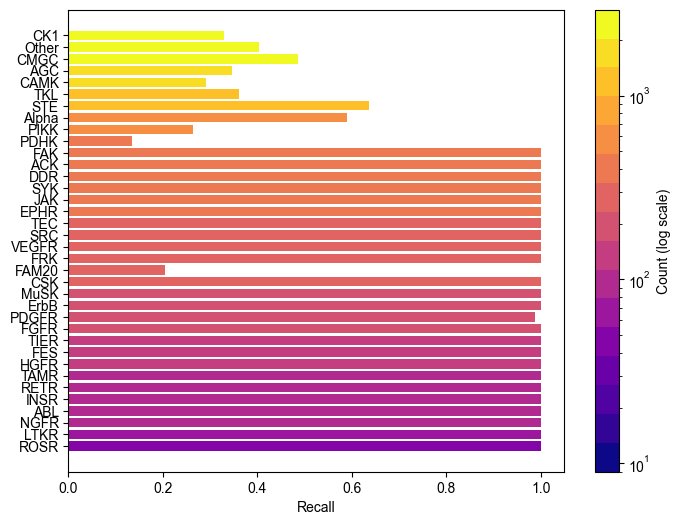

In [49]:
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import colormaps
from matplotlib.colors import LogNorm

cmap = colormaps['plasma'].resampled(16)
counts = np.asarray([count for _, count in sorted_counts])
colors = cmap(np.log(counts) / np.log(counts).max())

fig, ax = plt.subplots()
x = [k for k, _ in sorted_counts]
x_pos = np.arange(len(x))
y = [family_results[k]['BinaryRecall'] for k,_ in sorted_counts]

ax.barh(x_pos, y, align='center', color=colors)
ax.set_yticks(x_pos, labels=x)
ax.invert_yaxis()
ax.set_xlabel('Recall')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=LogNorm(vmin=counts.min(), vmax=counts.max()))
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Count (log scale)')

locator = ticker.LogLocator(base=10.0, numticks=20) # 'auto' tries to find a reasonable number
cbar.ax.yaxis.set_major_locator(locator)

# You might also want to format the tick labels nicely
formatter = ticker.LogFormatterSciNotation() # Or just LogFormatter()
cbar.ax.yaxis.set_major_formatter(formatter)

fig.set_size_inches(8, 6)
ax


In [11]:
def create_kinase_graph(results : dict, counts : dict, model_name : str):
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    cmap = colormaps['plasma'].resampled(16)
    counts = np.asarray([count for _, count in sorted_counts])
    colors = cmap(np.log(counts) / np.log(counts).max())

    fig, ax = plt.subplots()
    x = [k for k, _ in sorted_counts]
    x_pos = np.arange(len(x))
    y = [results[k]['BinaryRecall'] for k,_ in sorted_counts]

    ax.barh(x_pos, y, align='center', color=colors)
    ax.set_yticks(x_pos, labels=x)
    ax.invert_yaxis()
    ax.set_xlabel('Recall')

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=LogNorm(vmin=counts.min(), vmax=counts.max()))
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Count (log scale)')

    locator = ticker.LogLocator(base=10.0, numticks=20) # 'auto' tries to find a reasonable number
    cbar.ax.yaxis.set_major_locator(locator)

    # You might also want to format the tick labels nicely
    formatter = ticker.LogFormatterSciNotation() # Or just LogFormatter()
    cbar.ax.yaxis.set_major_formatter(formatter)

    fig.set_size_inches(8, 6)

    fig.savefig(f'../img/{model_name}_kinase_recall_graph.png')

In [12]:
def kinase_analysis(results : pd.DataFrame):
    metrics = MetricCollection([Recall('binary'), ConfusionMatrix('binary')])
    kinase_metrics = {}
    family_metrics = {}
    family_counts = {}
    kinase_counts = {}
    
    def calc_kinase_metrics(row):
        labels = torch.as_tensor(row['valid_labels'], dtype=torch.int8)
        preds = torch.as_tensor(row['valid_preds'])
        names = row['kinase_preds']['Name']
        families = row['kinase_preds']['Family']
        idx = 0
        for site in range(len(labels)):
            if labels[site] == 1:
                if names[idx] not in kinase_metrics:
                    kinase_metrics[names[idx]] = metrics.clone()
                    kinase_counts[names[idx]] = 0

                if families[idx] not in family_metrics:
                    family_metrics[families[idx]] = metrics.clone()
                    family_counts[families[idx]] = 0

                kinase_metrics[names[idx]].update(preds[site].unsqueeze(0), labels[site].unsqueeze(0))
                family_metrics[families[idx]].update(preds[site].unsqueeze(0), labels[site].unsqueeze(0))
                family_counts[families[idx]] += 1
                kinase_counts[names[idx]] += 1
                idx += 1

    results.apply(calc_kinase_metrics, axis=1)
    family_results = {}
    for family, m in family_metrics.items():
        family_results[family] = m.compute()

    kinase_results = {}
    for kinase, m in kinase_metrics.items():
        kinase_results[kinase] = m.compute()

    return {
        'family_results' : family_results,
        'family_counts' : family_counts,
        'kinase_results' : kinase_results,
        'kinase_counts' : kinase_counts
    }

# Structural Analysis

In [13]:
from Bio.PDB import PDBParser, SASA
from Bio.Data.IUPACData import protein_letters_3to1
import os

# According to Tien et. al (2013), theoretical
max_asa_vals = {
    'SER' : 155.0,
    'THR' : 172.0,
    'TYR' : 263.0
}

def calc_struct_errors(sites : list[str], relevant_indices : np.ndarray, residues : list):
    """
    Calculate the structural errors of positive predicitions. Error is the distance between 
    the CA of the predicted resiude and CA of the closest true positive residue.

    Returns array of shape (n,) where n is the number of positive predictions
    """
    true_positive_coords = []
    positive_coords = []

    # Sites are 1-based
    sites = [eval(s) - 1 for s in sites]
    for res in sites:
        for atom in residues[res]:
            if atom.name == 'CA':
                true_positive_coords.append(atom.coord)

    for res in relevant_indices:
        for atom in residues[res]:
            if atom.name == 'CA':
                positive_coords.append(atom.coord)
    
    distances = np.zeros([len(true_positive_coords), len(positive_coords)], dtype=np.float32)
    for i, tp in enumerate(true_positive_coords):
        # Euclidean distance
        distances[i] = np.sqrt(np.sum(np.square(tp - positive_coords), -1))

    errors = np.min(distances, 0)
    fp_errors = errors[errors > 0].squeeze()

    if len(errors.shape) == 0:
        errors = errors.reshape(1,)
    if len(fp_errors.shape) == 0:
        fp_errors = fp_errors.reshape(1,)
    return errors, fp_errors

def compute_rsa(structure, residues, relevant_indices, sr :SASA.ShrakeRupley):
    # Calculate RSA using SR
    model = structure[0] 
    sr.compute(model, 'R')
    rsa_vals = []
    for i in relevant_indices:
        res = residues[i]
        rsa_vals.append(res.sasa / max_asa_vals[res.resname])
    
    return rsa_vals

def calc_struct_metrics(results : pd.DataFrame, verbose=0, thresh=0.5):
    parser = PDBParser(QUIET=True)
    out = {}
    sr = SASA.ShrakeRupley()
    binary_preds = results['valid_preds'].apply(lambda x: x > thresh)
    # Labels contain the label for [SEQ], so they're off by one. Same as 'sites'
    indices = results['mask'].apply(lambda x: np.nonzero(x)[0] - 1)
    # Assuming protein ids as index
    total_errors = []
    total_fp_errors = []
    total_weighted_errors = []
    total_rsa_vals = []
    for prot in results.index:
        path = f'../data/pdbs/{prot}.pdb'
        
        # Not all proteins have pdbs
        if not os.path.exists(path):
            continue

        prot_results = results.loc[prot]
        struct = parser.get_structure(prot, path)
        residues = [r for r in struct.get_residues()]
        seq = "".join([protein_letters_3to1[r.resname.capitalize()] for r in residues])

        # Skip mismatched proteins (there are a few pdbs that do not match their sequence from the phosphosite dataset uniprots)
        if seq != prot_results['sequence']:
            if verbose > 0:
                print(f'{prot} sequence does not match residue sequence in .pdb')
                print(f'DB sequence: {prot_results["sequence"]}')
                print(f'Residue sequence: {seq}')
            continue
        
        relevant_indices = indices[prot][binary_preds[prot]]
        if relevant_indices.shape[0] == 0:
            # If there are no predictions that could be classified as positive
            # according to the threshold, there is nothing to compute
            continue
        total_rsa_vals.extend(compute_rsa(struct, residues, relevant_indices, sr))
        errors, fp_errors = calc_struct_errors(results.loc[prot]['sites'], relevant_indices, residues)
        weighted_errors = sigmoid(results.loc[prot]['preds'][relevant_indices]) * errors

        total_errors.extend(list(errors))
        total_fp_errors.extend(list(fp_errors))
        total_weighted_errors.extend(list(weighted_errors))

    suffix = ['total', 'fp', 'weighted']
    arrays = [total_errors, total_fp_errors, total_weighted_errors]
    for suffix, array in zip(suffix, arrays):
        out[f'avg_error_{suffix}'] = np.mean(array)
        out[f'median_error_{suffix}'] = np.median(array)
        out[f'error_std_{suffix}'] = np.std(array)

    out['avg_rsa'] = np.mean(total_rsa_vals)
    out['median_rsa'] = np.median(total_rsa_vals)
    out['std_rsa'] = np.std(total_rsa_vals)
    out['25_percentile_rsa'] = np.percentile(total_rsa_vals, 25)

    return out

In [18]:
struct_metrics = calc_struct_metrics(merged)
struct_metrics

{'avg_error_total': 6.692,
 'median_error_total': 0.0,
 'error_std_total': 17.762836,
 'avg_error_fp': 35.42684,
 'median_error_fp': 29.025457,
 'error_std_fp': 25.540964,
 'avg_error_weighted': 6.140344,
 'median_error_weighted': 0.0,
 'error_std_weighted': 17.130068,
 'avg_rsa': 0.5084701490273682,
 'median_rsa': 0.5820787864285304,
 'std_rsa': 0.2416460381374924,
 '25_percentile_rsa': 0.32715408239512644}

In [ ]:
def calculate_metrics(model_name, n_folds = 5):
    preds = torch.load(f'../data/preds/{model_name}_results.pkl', map_location='cpu')
    prot_info = pd.read_json('../data/prots_with_kinase_preds.json').set_index('id')
    struct_metrics= None
    kinase_metrics = None
    for i in range(n_folds):
        fold_df = pd.DataFrame.from_dict(preds[f'fold_{i}'], orient='index')

        # Extract relevant labels and prediction probabilities according to the mask column
        fold_df['valid_labels'] = fold_df.apply(lambda row: row['labels'][row['mask']], axis=1)
        fold_df['valid_preds'] = fold_df.apply(lambda row: sigmoid(row['preds'][row['mask']]), axis=1)
        merged = test_df.join(prot_info, how='left')

        # Compute kinase-related metrics
        if not kinase_metrics:
            kinase_metrics = kinase_analysis(merged)
        else:
            for dict_key, m_dict in kinase_analysis(merged).items():
                for k, v in m_dict.items():
                    kinase_metrics[dict_key][k] += v

        # Compute structural metrics
        if not struct_metrics:
            struct_metrics = calc_struct_metrics(merged) 
        else:
            for k, v in calc_struct_metrics(merged).items():
                struct_metrics[k] += v

    # Average the results
    for dict_key, m_dict in kinase_metrics.items():
        for k, v in m_dict.items():
            kinase_metrics[dict_key][k] = v / n_folds

    for k, v in struct_metrics.items():
        struct_metrics[k] = v / n_folds

    create_kinase_graph(kinase_metrics['family_results'], kinase_metrics['family_counts'], model_name)

    # Save metrics
    with open(f'../data/preds/{model_name}_result_analysis.json', 'w') as f:
        json.dump({
            'kinase_metrics_avg' : kinase_metrics,
            'struct_metrics_avg' : struct_metrics
        }, f, indent='\t')

In [16]:
models = ['encoder_S_60_focal']
for model in models:
    calculate_metrics(model, n_folds=1)

ValueError: too many values to unpack (expected 2)